In [40]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [41]:
import cv2
import numpy as np

# Lire l'image
image_path = 'eti.jpg'
image = cv2.imread(image_path)

# Convertir en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour améliorer la détection des contours
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Détecter les contours
contours, _ = cv2.findContours(
    thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [42]:
from PIL import Image
import numpy as np


def load_and_process_image(image_path):
    # Load the ima
    # ge
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((500, 500), Image.BICUBIC)  # Resize using BICUBIC filter
    img_array = np.array(img)

    # Normalize the image to a range suitable for G-code (e.g., 0 to 100)
    normalized_img = (img_array / 100.0) * 100

    return normalized_img


# Ensure the image path is correct
image_path = 'car.png'  # Update this path if necessary
image_data = load_and_process_image(image_path)


def image_to_gcode(image_data):
    gcode = []
    for y in range(image_data.shape[0]):
        for x in range(image_data.shape[1]):
            # Assuming a simple engraving pattern where darker pixels are engraved deeper
            depth = image_data[y, x]
            if depth > 0:  # Only engrave if the pixel is not black
                gcode.append(f"G1 X{x} Y{y} Z{depth}")
    return gcode


gcode_commands = image_to_gcode(image_data)


def save_gcode_to_file(gcode_commands, file_path):
    try:
        with open(file_path, 'w') as f:
            for command in gcode_commands:
                f.write(command + '\n')
        print(f"G-code saved to {file_path}")
    except Exception as e:
        print(f"Error saving G-code to file: {e}")


# Ensure the file path is correct and you have write permissions
gcode_file_path = 'gcode.gcode'  # Update this path if necessary
save_gcode_to_file(gcode_commands, gcode_file_path)

G-code saved to gcode.gcode


In [43]:
g_code = ""

for contour in contours:
    # Obtenir les coordonnées du contour
    x, y, w, h = cv2.boundingRect(contour)

    # Générer du G-code pour se déplacer vers le contour
    g_code += f"G01 X{x} Y{y}\n"

    # Générer du G-code pour dessiner le contour
    # Ici, nous supposons que le robot peut dessiner directement les contours
    # Vous devrez adapter cela en fonction de la manière dont votre robot fonctionne
    for i in range(len(contour)):
        x, y = contour[i][0]
        g_code += f"G01 X{x} Y{y}\n"

print(g_code)

G01 X2042 Y4095
G01 X2042 Y4095
G01 X1416 Y4095
G01 X1416 Y4095
G01 X1417 Y4095
G01 X2039 Y4094
G01 X2040 Y4094
G01 X2039 Y4095
G01 X2040 Y4095
G01 X1471 Y4061
G01 X1472 Y4061
G01 X1471 Y4062
G01 X1466 Y4061
G01 X1466 Y4061
G01 X1488 Y4058
G01 X1488 Y4058
G01 X1488 Y4059
G01 X1489 Y4056
G01 X1489 Y4056
G01 X1490 Y4057
G01 X840 Y3654
G01 X843 Y3654
G01 X842 Y3655
G01 X840 Y3655
G01 X843 Y3655
G01 X860 Y3648
G01 X860 Y3648
G01 X847 Y3648
G01 X848 Y3648
G01 X847 Y3649
G01 X848 Y3649
G01 X816 Y3648
G01 X816 Y3648
G01 X870 Y3647
G01 X870 Y3647
G01 X870 Y3648
G01 X871 Y3647
G01 X810 Y3643
G01 X812 Y3643
G01 X810 Y3645
G01 X810 Y3646
G01 X812 Y3646
G01 X813 Y3647
G01 X814 Y3647
G01 X814 Y3644
G01 X813 Y3644
G01 X846 Y3642
G01 X849 Y3642
G01 X848 Y3643
G01 X847 Y3643
G01 X846 Y3644
G01 X847 Y3644
G01 X848 Y3643
G01 X849 Y3643
G01 X869 Y3640
G01 X871 Y3640
G01 X869 Y3642
G01 X870 Y3643
G01 X872 Y3643
G01 X872 Y3640
G01 X852 Y3639
G01 X853 Y3639
G01 X852 Y3640
G01 X853 Y3641
G01 X854 Y3641
G01 X

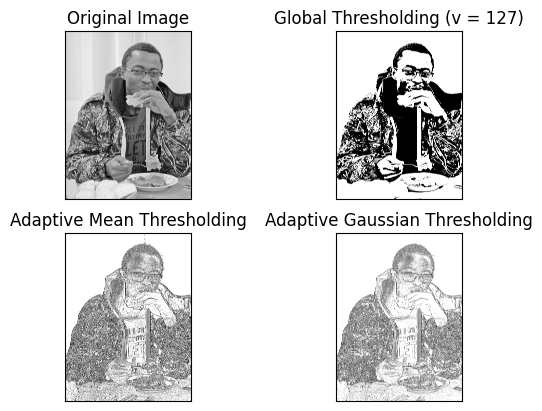

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('eti.jpg', 0)

# Apply median blur
img = cv2.medianBlur(img, 5)

# Global thresholding
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Adaptive mean thresholding
th2 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian thresholding
th3 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Titles and images for plotting
titles = ['Original Image',
          'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# Plotting
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Assuming the rest of your code for reading and processing the image is here

# Function to detect lines in a binary image


def detect_lines(image):
    # Convert the binary image to grayscale if it's not already
    gray = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Use Hough Line Transform to detect lines
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180,
                            threshold=100, minLineLength=100, maxLineGap=10)

    # Return the coordinates of the detected lines
    return lines


# Detect lines in the adaptive mean thresholded image
lines = detect_lines(th2)

# Initialize G-code
g_code = ""


def generate_g_code(lines):
    g_code = ""

    for line in lines:
        # Each line is a list of points, we take the first point as the start
        x1, y1, x2, y2 = line[0]

        # Move to the start of the line
        g_code += f"G01 X{x1} Y{y1} Z0\n"

        # Draw the line
        g_code += f"G01 X{x2} Y{y2} Z0\n"

        # Move back to the starting point or to a safe location
        g_code += f"G00 X{x1} Y{y1} Z10\n"

    return g_code


# Correctly call the function and print the generated G-code
generated_g_code = generate_g_code(lines)
print(generated_g_code)

G01 X609 Y2449 Z0
G01 X717 Y2341 Z0
G00 X609 Y2449 Z10
G01 X737 Y2422 Z0
G01 X887 Y2272 Z0
G00 X737 Y2422 Z10
G01 X1540 Y712 Z0
G01 X1613 Y540 Z0
G00 X1540 Y712 Z10
G01 X1211 Y1854 Z0
G01 X1269 Y1723 Z0
G00 X1211 Y1854 Z10
G01 X1641 Y924 Z0
G01 X1790 Y619 Z0
G00 X1641 Y924 Z10
G01 X194 Y2676 Z0
G01 X326 Y2544 Z0
G00 X194 Y2676 Z10
G01 X324 Y3272 Z0
G01 X503 Y3093 Z0
G00 X324 Y3272 Z10
G01 X1664 Y841 Z0
G01 X1848 Y446 Z0
G00 X1664 Y841 Z10
G01 X1655 Y773 Z0
G01 X1790 Y495 Z0
G00 X1655 Y773 Z10
G01 X763 Y2358 Z0
G01 X828 Y2235 Z0
G00 X763 Y2358 Z10
G01 X851 Y2770 Z0
G01 X915 Y2592 Z0
G00 X851 Y2770 Z10
G01 X281 Y2381 Z0
G01 X401 Y2261 Z0
G00 X281 Y2381 Z10
G01 X607 Y3391 Z0
G01 X719 Y3197 Z0
G00 X607 Y3391 Z10
G01 X338 Y2678 Z0
G01 X485 Y2531 Z0
G00 X338 Y2678 Z10
G01 X1736 Y793 Z0
G01 X1825 Y563 Z0
G00 X1736 Y793 Z10
G01 X819 Y2955 Z0
G01 X871 Y2843 Z0
G00 X819 Y2955 Z10
G01 X1197 Y1425 Z0
G01 X1318 Y1072 Z0
G00 X1197 Y1425 Z10
G01 X970 Y2058 Z0
G01 X1025 Y1950 Z0
G00 X970 Y2058 Z10
G01

In [46]:
import cv2

# 1. Load the Image with Black Lines
image = cv2.imread('16.jpg')
if image is None:
    raise ValueError("Image not found. Check the file path.")

# 2. Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Thresholding: Identify Black Areas
threshold_value = 127  # Adjust if needed
_, thresholded = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Using adaptive thresholding as well
th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)
th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 11, 2)

# 4. Contour Detection
contours, _ = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 5. Generate G-Code from Contours
def generate_gcode(contours, N=-1, I=0, J=0):
    """
    Generates G-code based on the contours found in an image.

    Parameters:
    - contours: List of contours found by OpenCV.
    - N: Number of contours to process. If -1, processes all contours.
    - I: Starting X coordinate.
    - J: Starting Y coordinate.

    Returns:
    - A string containing the generated G-code.
    """
    gcode = "G21 ; Set units to millimeters\n"
    gcode += f"G00 X{I} Y{J} ; Move to start position\n"

    if N == -1:
        N = len(contours)  # Process all contours

    for i in range(min(N, len(contours))):
        contour = contours[i]
        if len(contour) == 0:
            continue

        # Move to the first point of the contour
        first_point = contour[0][0]
        gcode += f"G00 X{first_point[0]} Y{first_point[1]} ; Move to start of contour\n"

        # Follow the contour
        for point in contour:
            x, y = point[0]
            gcode += f"G01 X{x} Y{y}\n"

        # Optionally return to origin after processing each contour
        gcode += "G00 X0 Y0 ; Return to origin\n"

    return gcode

# Example usage
gcode = generate_gcode(contours, I=10, J=20)

# 6. Save the G-Code to a File
with open('output.gcode', 'w') as file:
    file.write(gcode)

print("G-code generated successfully!")



G-code generated successfully!


In [52]:
import re

def convert_gcode_to_fanuc(gcode_file):
  """
  Converts a generic G-code file to a FANUC LR Mate 200iD 4S compatible format.

  Args:
    gcode_file: Path to the G-code file.

  Returns:
    A string with the equivalent FANUC code.
  """

  # Open the G-code file
  with open(gcode_file, 'r') as f:
    lines = f.readlines()

  # Initialize FANUC code
  fanuc_code = "% \nO1000 (FANUC PROGRAM)\n"

  # Iterate over G-code lines
  for line in lines:
    # Remove comments
    line = re.sub(r'\(.*?\)', '', line).strip()

    # Convert G-code commands to FANUC
    if line.startswith('G0'):
      fanuc_code += f"J P[{get_coordinates(line)}] 100% FINE\n"  # Rapid move
    elif line.startswith('G1'):
      fanuc_code += f"L P[{get_coordinates(line)}] 100mm/sec FINE\n"  # Linear move
    elif line.startswith('G28'):
      fanuc_code += "HMP\n"  # Return to home position
    else:
      fanuc_code += f"{line}\n"  # Other commands

  fanuc_code += "END\n%"
  return fanuc_code

def get_coordinates(line):
  """
  Extracts the X, Y, and Z coordinates from a G-code line.

  Args:
    line: A G-code line.

  Returns:
    A string with X, Y, and Z coordinates separated by commas.
  """
  coordinates = []
  for param in ['X', 'Y', 'Z']:
    coordinate = re.search(f'{param}([-+]?\d*\.?\d*)', line)
    if coordinate:
      coordinates.append(coordinate.group(1))
    else:
      coordinates.append('0')  # Default value if parameter is not found
  return ', '.join(coordinates)

def write_fanuc_code_to_file(fanuc_code, output_filename):
    """
    Writes the Fanuc code to a file with the.fnc extension.
    """
    # Ensure the filename has the.fnc extension
    if not output_filename.endswith('.cnc'):
        output_filename += '.cnc'
    
    with open(output_filename, 'w') as file:
        file.write(fanuc_code)

# Example usage:
gcode_file = "output.gcode"
fanuc_code = convert_gcode_to_fanuc(gcode_file)
write_fanuc_code_to_file(fanuc_code, "converted_program")
print(fanuc_code)

% 
O1000 (FANUC PROGRAM)
G21 ; Set units to millimeters
J P[10, 20, 0] 100% FINE
J P[279, 210, 0] 100% FINE
J P[279, 210, 0] 100% FINE
J P[281, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[204, 210, 0] 100% FINE
J P[204, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[133, 210, 0] 100% FINE
J P[133, 210, 0] 100% FINE
J P[134, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[125, 210, 0] 100% FINE
J P[125, 210, 0] 100% FINE
J P[127, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[123, 210, 0] 100% FINE
J P[123, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[116, 210, 0] 100% FINE
J P[116, 210, 0] 100% FINE
J P[0, 0, 0] 100% FINE
J P[245, 194, 0] 100% FINE
J P[245, 194, 0] 100% FINE
J P[245, 198, 0] 100% FINE
J P[244, 199, 0] 100% FINE
J P[244, 202, 0] 100% FINE
J P[243, 203, 0] 100% FINE
J P[243, 206, 0] 100% FINE
J P[244, 207, 0] 100% FINE
J P[245, 207, 0] 100% FINE
J P[246, 206, 0] 100% FINE
J P[247, 206, 0] 100% FINE
J P[248, 207, 0] 100% FINE
J P[256, 207, 0] 100% FINE
J P[254, 205, 0] 100% FIN